<a href="https://colab.research.google.com/github/ArthurArias/Portfolio/blob/main/Proyecto%20AirBnb/TFM_ETL_AIRBNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#Proceso de integración (ETL) - Perfilado de Airbnb dataset



In [311]:
# from google.colab import drive
# drive.mount('/content/drive')

In [312]:
import pandas as pd
# from google.colab import drive
# drive.mount('/content/drive')


 Opciones de visualización de datos en pantalla:

In [313]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [314]:
# from google.colab import drive
# drive.mount('/content/drive')

Obtención de datos desde archivos CSV
nombres de archivos:


1.   d_c-> calendar.csv
2.   d_l-> listening.csv
3.   d_l1-> listening2.csv
4.   d_n-> neighbourhoods.csv
5.   d_r-> reviews.csv
6.   d_r2-> reviews2.cs



#Importación de archivos CSV

In [315]:
d_c=pd.read_csv('/content/drive/MyDrive/TFM/Proyecto  TFM/Barcelona/calendar.csv')
d_l=pd.read_csv('/content/drive/MyDrive/TFM/Proyecto  TFM/Barcelona/listings.csv')
d_l2=pd.read_csv('/content/drive/MyDrive/TFM/Proyecto  TFM/Barcelona/listings_2.csv')
d_n=pd.read_csv('/content/drive/MyDrive/TFM/Proyecto  TFM/Barcelona/neighbourhoods.csv')
d_r=pd.read_csv('/content/drive/MyDrive/TFM/Proyecto  TFM/Barcelona/reviews.csv')
d_r2=pd.read_csv('/content/drive/MyDrive/TFM/Proyecto  TFM/Barcelona/reviews2.csv')


# Análisis General
Comprobación de dimensiones del archivo

In [316]:
#creación de diccionario para la realización de tabla de dimensión

d_bna={'calendar': d_c,'listings':d_l ,'listings_2':d_l2 ,'neighbourhoods':d_n,'reviews':d_r,' reviews2':d_r2}

dicc_col={}
for x  in d_bna.keys():
    dicc_col[x]=list(d_bna[x].shape)
    
Shape_bcn=pd.DataFrame(dicc_col, index=['filas', 'columnas'])
Shape_bcn

,calendar,listings,listings_2,neighbourhoods,reviews,reviews2
filas,6075397,16646,16646,73,673673,673673
columnas,7,74,18,2,6,2


## Análisis de la tabla Calendar

In [317]:
# Tabla calendar
d_c.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,18674,2022-06-08,f,$250.00,$250.00,4.0,1125.0
1,18674,2022-06-09,f,$250.00,$250.00,4.0,1125.0
2,18674,2022-06-10,f,$250.00,$250.00,4.0,1125.0
3,18674,2022-06-11,f,$250.00,$250.00,4.0,1125.0
4,18674,2022-06-12,f,$181.00,$181.00,4.0,1125.0


Diccionario de datos para la tabla calendar, usado como referencia

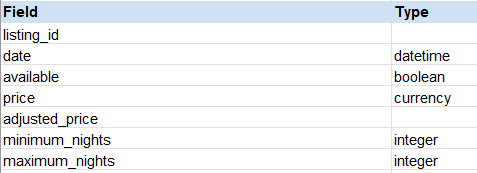

In [318]:
d_c.info()
# Errores detectados en la tabla calendar
# columna: date             formato original: object  deseado: datetime  modificación-> cambiar formato
# columna: price            formato original: object  deseado: float64   modificación-> cambiar formato,extraer '$'
# columna: adjusted_price   formato original: object  deseado: float64   modificación-> cambiar formato,extraer '$'
# columna: available        formato original: object  deseado: bool      modificación-> cambiar 't'->1 y 'f'-> 0cambiar formato a bool

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6075397 entries, 0 to 6075396
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 324.5+ MB


Transformación de datos: Modificaciones de formato en la tabla calendar

In [319]:


d_c.date=pd.to_datetime(d_c.date)# modificación del formtato object a datetime de la columna date
d_c.price=d_c.price.str.replace(',','').str.replace('[\$]', '').astype(float) # modificación del formtato object a int64 de la columna price
d_c.adjusted_price=d_c.adjusted_price.str.replace(',','').str.replace('[\$]', '').astype(float) # modificación del formtato object a float64 de la columna adjusted_price
d_c['available'].replace('f',0, inplace=True) # modificar formato de object a  boolean
d_c['available'].replace('t',1, inplace=True)# modificar formato de object a  boolean
d_c['available']=d_c['available'].astype(bool)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [320]:
# Comprobación de la modificación realizada
d_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6075397 entries, 0 to 6075396
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       bool          
 3   price           float64       
 4   adjusted_price  float64       
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: bool(1), datetime64[ns](1), float64(4), int64(1)
memory usage: 283.9 MB


Comprobación de filas vacias

In [321]:
print('Comprobación de filas vacias\n',d_c.isna().sum(),'\n')# 2 columnas detectadas
print('Eliminación de filas vacias',d_c.dropna(inplace=True),'\n')
print('Comprobación de elementos a eliminar\n',d_c.isna().sum(),'\n')

# nota: Las filas eliminadas representan al 0.58% del total de filas, por lo que no repercutirá en la toma de decisiones, la eliminación de estas

Comprobación de filas vacias
 listing_id          0
date                0
available           0
price               0
adjusted_price      0
minimum_nights    358
maximum_nights    358
dtype: int64 

Eliminación de filas vacias None 

Comprobación de elementos a eliminar
 listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64 



In [322]:
 # el perfilado se realiza en función del tipo de datos
tipos1 = ['int64', 'float64','bool']
tipos2 = ['object', 'datetime64[ns]']
dc_num=d_c.select_dtypes(include=tipos1)
dc_txt=d_c.select_dtypes(include=tipos2)

*Perfilado* Cuantitativo de datos de tabla calendar

In [323]:
#creación de columna 'unicos'
p_calendar=pd.DataFrame() # creación de dataframe vacio
p_calendar['unicos']=dc_num.nunique()

#creación de columna 'tipos'
a=dc_num.dtypes
a=a.reset_index()
a=a.drop('index', axis=1)
p_calendar['tipos']=list(a[0])
#creación de columna 'nulos'
a=dc_num.isnull().sum().reset_index()
a=a.drop('index', axis=1)
p_calendar['nulos']=list(a[0])
#creación de columna 'no nulos'
a=dc_num.notnull().sum().reset_index()
a=a.drop('index', axis=1)
p_calendar['no nulos']=list(a[0])
#creación de columna 'min'
a=dc_num.min().reset_index()
a=a.drop('index', axis=1)
p_calendar['min']=list(a[0])
p_calendar
#creación de columna 'max'
a=dc_num.max().reset_index()
a=a.drop('index', axis=1)
p_calendar['max']=list(a[0])
p_calendar
#creación de columna 'num registros'
a=dc_num.count().reset_index()
a=a.drop('index', axis=1)
p_calendar['num registros']=list(a[0])

# creación de columna 'media'
# a=d_c.mean().reset_index()
# a=a.drop('index', axis=1)
# p_calendar['medio']=list(a[0])

# creación de columna '% nulos'
p_calendar['% nulos']=(p_calendar['nulos']/p_calendar['num registros'])*100
p_calendar

,unicos,tipos,nulos,no nulos,min,max,num registros,% nulos
listing_id,16645,int64,0,6075039,18674,643961821979785232,6075039,0.0
available,2,bool,0,6075039,False,True,6075039,0.0
price,2039,float64,0,6075039,8.0,91794.0,6075039,0.0
adjusted_price,2041,float64,0,6075039,8.0,91794.0,6075039,0.0
minimum_nights,95,float64,0,6075039,1.0,1124.0,6075039,0.0
maximum_nights,410,float64,0,6075039,1.0,2147483647.0,6075039,0.0


*Perfilado* Cualitativo de datos de tabla calendar

In [324]:
p_listenig=pd.DataFrame() # creación de dataframe vacio
p_listenig=dc_txt.describe().T

#creación de columna 'tipos'
a=dc_txt.dtypes
a=a.reset_index()
a=a.drop('index', axis=1)
p_listenig['tipos']=list(a[0])


#creación de columna 'nulos'
a=dc_txt.isnull().sum().reset_index()
a=a.drop('index', axis=1)
p_listenig['nulos']=list(a[0])


#creación de columna 'no nulos'
a=dc_txt.notnull().sum().reset_index()
a=a.drop('index', axis=1)
p_listenig['no nulos']=list(a[0])
p_listenig

# creación de columna '% nulos'
p_listenig['% nulos']=(p_listenig['nulos']/p_listenig['count'])*100
p_listenig

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,count,unique,top,freq,first,last,tipos,nulos,no nulos,% nulos
date,6075039,366,2023-05-28,16645,2022-06-07,2023-06-07,datetime64[ns],0,6075039,0.0


###Documento Final de tabla Calendar una vez hecho el ETL

In [375]:
#Tabla modificada calendar (CSV)
d_c.to_csv('calendar_new.csv')

## Análisis de tabla listings



In [326]:
d_l.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,20220607181919,2022-06-08,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,https://www.airbnb.com/users/show/71615,Mireia And Maria,2010-01-19,"Barcelona, Catalonia, Spain","We are Mireia (43) & Maria (45), two multiling...",within an hour,98%,92%,f,https://a0.muscache.com/im/users/71615/profile...,https://a0.muscache.com/im/users/71615/profile...,la Sagrada Família,38.0,38.0,"['email', 'phone']",t,t,"Barcelona, CT, Spain",la Sagrada Família,Eixample,41.40556,2.17262,Entire rental unit,Entire home/apt,8,NaN,2 baths,3.0,6.0,"[""Essentials"", ""Shampoo"", ""Hot water"", ""Long t...",$220.00,1,1125,1.0,5.0,1125.0,1125.0,2.3,1125.0,NaN,t,3,10,28,139,2022-06-08,27,6,1,2013-05-27,2022-05-30,4.46,4.58,4.73,4.81,4.92,4.77,4.38,HUTB-002062,t,35,35,0,0,0.25
1,592553071373622034,https://www.airbnb.com/rooms/592553071373622034,20220607181919,2022-06-07,TRAVEL TIME RENT FOR MONTHS,APARTAMENTO CON 2 BAÑOS !!. PÒR MESES. Perfec...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,115783949,https://www.airbnb.com/users/show/115783949,Rosa María,2017-02-10,"L'Hospitalet de Llobregat, Catalonia, Spain",NaN,within a few hours,100%,85%,f,https://a0.muscache.com/im/pictures/user/7844c...,https://a0.muscache.com/im/pictures/user/7844c...,NaN,18.0,18.0,"['email', 'phone']",t,t,NaN,la Bordeta,Sants-Montjuïc,41.36786,2.12831,Entire rental unit,Entire home/apt,8,NaN,2 baths,3.0,5.0,"[""Smoke alarm"", ""Fire extinguisher"", ""Long ter...",$61.00,31,1125,31.0,31.0,1125.0,1125.0,31.0,1125.0,NaN,t,28,41,56,236,2022-06-07,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,28,27,1,0,NaN


In [327]:
d_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16646 entries, 0 to 16645
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            16646 non-null  int64  
 1   listing_url                                   16646 non-null  object 
 2   scrape_id                                     16646 non-null  int64  
 3   last_scraped                                  16646 non-null  object 
 4   name                                          16636 non-null  object 
 5   description                                   16557 non-null  object 
 6   neighborhood_overview                         10031 non-null  object 
 7   picture_url                                   16646 non-null  object 
 8   host_id                                       16646 non-null  int64  
 9   host_url                                      16646 non-null 

Analicis Visual de columnas, a partir de tabla dinamica creada en Excel

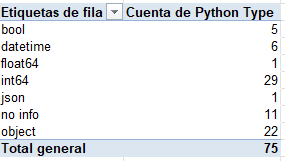

Analicis Visual de incoherencia de datos cualitativo
aqui se comprueba que los  datos son string 

In [328]:
tipos1 = ['object']
d_l.select_dtypes(include=tipos1).head(2)

,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,https://www.airbnb.com/rooms/18674,2022-06-08,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,https://www.airbnb.com/users/show/71615,Mireia And Maria,2010-01-19,"Barcelona, Catalonia, Spain","We are Mireia (43) & Maria (45), two multiling...",within an hour,98%,92%,f,https://a0.muscache.com/im/users/71615/profile...,https://a0.muscache.com/im/users/71615/profile...,la Sagrada Família,"['email', 'phone']",t,t,"Barcelona, CT, Spain",la Sagrada Família,Eixample,Entire rental unit,Entire home/apt,2 baths,"[""Essentials"", ""Shampoo"", ""Hot water"", ""Long t...",$220.00,t,2022-06-08,2013-05-27,2022-05-30,HUTB-002062,t
1,https://www.airbnb.com/rooms/592553071373622034,2022-06-07,TRAVEL TIME RENT FOR MONTHS,APARTAMENTO CON 2 BAÑOS !!. PÒR MESES. Perfec...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/115783949,Rosa María,2017-02-10,"L'Hospitalet de Llobregat, Catalonia, Spain",NaN,within a few hours,100%,85%,f,https://a0.muscache.com/im/pictures/user/7844c...,https://a0.muscache.com/im/pictures/user/7844c...,NaN,"['email', 'phone']",t,t,NaN,la Bordeta,Sants-Montjuïc,Entire rental unit,Entire home/apt,2 baths,"[""Smoke alarm"", ""Fire extinguisher"", ""Long ter...",$61.00,t,2022-06-07,NaN,NaN,NaN,f


Analicis de incoherencia de datos cuantitativos,
aqui se comprueba que los sean numericos y demodifican los que no lo son

Datos tipo ¨object¨ que deberian ser datetime

In [329]:
# modificar a formato datetime:
# last_scraped
# host_since
# calendar_last_scraped
# first_review
# last_review
d_l[['last_scraped','host_since','calendar_last_scraped','first_review','last_review']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16646 entries, 0 to 16645
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   last_scraped           16646 non-null  object
 1   host_since             16641 non-null  object
 2   calendar_last_scraped  16646 non-null  object
 3   first_review           12965 non-null  object
 4   last_review            12965 non-null  object
dtypes: object(5)
memory usage: 650.4+ KB


Modificación a formato datetime

In [330]:
# Lista con las columnas a modificar
b=['last_scraped','host_since','calendar_last_scraped','first_review','last_review']
for x in range(len(b)):
        d_l[b[x]]=pd.to_datetime(d_l[b[x]])# modificación del formtato object a datetime de la columna 
d_l[['last_scraped','host_since','calendar_last_scraped','first_review','last_review']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16646 entries, 0 to 16645
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   last_scraped           16646 non-null  datetime64[ns]
 1   host_since             16641 non-null  datetime64[ns]
 2   calendar_last_scraped  16646 non-null  datetime64[ns]
 3   first_review           12965 non-null  datetime64[ns]
 4   last_review            12965 non-null  datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 650.4 KB


Datos tipo ¨object¨ que deberian ser int64 o float64

In [331]:
# Modificar formato a float64, eliminar simbolo % y simbolo $
# host_response_rate
# host_acceptance_rate
# price
d_l[['host_response_rate','host_acceptance_rate','price']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16646 entries, 0 to 16645
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   host_response_rate    13721 non-null  object
 1   host_acceptance_rate  14020 non-null  object
 2   price                 16646 non-null  object
dtypes: object(3)
memory usage: 390.3+ KB


Modificación a formato int64 o float64 y extracción de simbolos (%)

In [332]:
d_l.host_response_rate=d_l.host_response_rate.str.replace(',','').str.replace('[\%]', '').astype(float) # modificación del formtato object a int64 de la columna price
d_l.host_acceptance_rate=d_l.host_acceptance_rate.str.replace(',','').str.replace('[\%]', '').astype(float) # modificación del formtato object a int64 de la columna price
d_l.price=d_l.price.str.replace(',','').str.replace('[\$]', '').astype(float) # modificación del formtato object a float64 de la columna adjusted_price

print("***Comprobación de la modificación del formato***\n")
print(d_l[['host_response_rate','host_acceptance_rate','price']].info() )
print()
print("***Comprobación de corrección y extracción de simbolos***\n\n",d_l[['host_response_rate','host_acceptance_rate','price']].head() )

***Comprobación de la modificación del formato***

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16646 entries, 0 to 16645
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_response_rate    13721 non-null  float64
 1   host_acceptance_rate  14020 non-null  float64
 2   price                 16646 non-null  float64
dtypes: float64(3)
memory usage: 390.3 KB
None

***Comprobación de corrección y extracción de simbolos***

    host_response_rate  host_acceptance_rate  price
0                98.0                  92.0  220.0
1               100.0                  85.0   61.0
2                25.0                 100.0  300.0
3               100.0                  99.0  192.0
4                99.0                 100.0  140.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


Datos tipo ¨object¨ que deberian ser bool

In [333]:
d_l[['host_is_superhost','host_has_profile_pic','host_identity_verified','has_availability','instant_bookable']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16646 entries, 0 to 16645
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   host_is_superhost       16641 non-null  object
 1   host_has_profile_pic    16641 non-null  object
 2   host_identity_verified  16641 non-null  object
 3   has_availability        16646 non-null  object
 4   instant_bookable        16646 non-null  object
dtypes: object(5)
memory usage: 650.4+ KB


In [334]:
d_l[['host_is_superhost','host_has_profile_pic','host_identity_verified','has_availability','instant_bookable']].head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable
0,f,t,t,t,t
1,f,t,t,t,f
2,f,t,f,t,t
3,f,t,t,t,t
4,t,t,t,t,t


In [335]:
# modificar a formato a bool:
# host_is_superhost
# host_has_profile_pic
# host_identity_verified
# has_availability
# instant_bookable

#Lista con las columnas a modificar
b=['host_is_superhost','host_has_profile_pic','host_identity_verified','has_availability','instant_bookable']
for x in range(len(b)):
    d_l[b[x]].replace('f',0, inplace=True)
    d_l[b[x]].replace('t',1, inplace=True)
    d_l[b[x]]=d_l[b[x]].astype(bool)
  

In [336]:
d_l[['host_is_superhost','host_has_profile_pic','host_identity_verified','has_availability','instant_bookable']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16646 entries, 0 to 16645
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   host_is_superhost       16646 non-null  bool 
 1   host_has_profile_pic    16646 non-null  bool 
 2   host_identity_verified  16646 non-null  bool 
 3   has_availability        16646 non-null  bool 
 4   instant_bookable        16646 non-null  bool 
dtypes: bool(5)
memory usage: 81.4 KB


In [337]:
tipos2 = ['int64', 'float64']
d_l.select_dtypes(include=tipos2).head(1)

# nota: todo correcto

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,20220607181919,71615,98.0,92.0,38.0,38.0,41.40556,2.17262,8,NaN,3.0,6.0,220.0,1,1125,1.0,5.0,1125.0,1125.0,2.3,1125.0,NaN,3,10,28,139,27,6,1,4.46,4.58,4.73,4.81,4.92,4.77,4.38,35,35,0,0,0.25


Aplicación de modificaciones

In [338]:
# comprobación de nodificaciones hecha correctamente
d_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16646 entries, 0 to 16645
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            16646 non-null  int64         
 1   listing_url                                   16646 non-null  object        
 2   scrape_id                                     16646 non-null  int64         
 3   last_scraped                                  16646 non-null  datetime64[ns]
 4   name                                          16636 non-null  object        
 5   description                                   16557 non-null  object        
 6   neighborhood_overview                         10031 non-null  object        
 7   picture_url                                   16646 non-null  object        
 8   host_id                                       16646 non-null  int6

Preparacion de datos para el perfilado de Listenig:
Para realizar un correcto perfilado, separaremos  lod datos cuantitativos de los cualitativos, y se hara un perfilado en paralelo de los datos

In [339]:
tipos1= ['int64', 'float64']
tipos2= ['object']
dl_num=d_l.select_dtypes(include=tipos1)
dl_txt=d_l.select_dtypes(include=tipos2)

Perfilado de listenig Cuantitativo

In [340]:
#creación de columna 'unicos'
p_listenig=pd.DataFrame() # creación de dataframe vacio
p_listenig['unicos']=dl_num.nunique()

#creación de columna 'tipos'
a=dl_num.dtypes
a=a.reset_index()
a=a.drop('index', axis=1)
p_listenig['tipos']=list(a[0])

#creación de columna 'nulos'
a=dl_num.isnull().sum().reset_index()
a=a.drop('index', axis=1)
p_listenig['nulos']=list(a[0])

#creación de columna 'no nulos'
a=dl_num.notnull().sum().reset_index()
a=a.drop('index', axis=1)
p_listenig['no nulos']=list(a[0])

#creación de columna 'max'
a=dl_num.max().reset_index()
a=a.drop('index', axis=1)
p_listenig['max']=list(a[0])

#creación de columna 'min'
a=dl_num.min().reset_index()
a=a.drop('index', axis=1)
p_listenig['min']=list(a[0])

#creación de columna 'num registros'
a=dl_num.count().reset_index()
a=a.drop('index', axis=1)
p_listenig['num registros']=list(a[0])

#creación de columna 'media'
a=dl_num.mean().reset_index()
a=a.drop('index', axis=1)
p_listenig['medio']=list(a[0])

# creación de columna '% nulos'
p_listenig['% nulos']=(p_listenig['nulos']/p_listenig['num registros'])*100
p_listenig


,unicos,tipos,nulos,no nulos,max,min,num registros,medio,% nulos
id,16646,int64,0,16646,6.439618e+17,1.867400e+04,16646,5.397653e+16,0.000000
scrape_id,1,int64,0,16646,2.022061e+13,2.022061e+13,16646,2.022061e+13,0.000000
host_id,7173,int64,0,16646,4.621742e+08,3.073000e+03,16646,1.283119e+08,0.000000
host_response_rate,70,float64,2925,13721,1.000000e+02,0.000000e+00,13721,9.237942e+01,21.317688
host_acceptance_rate,98,float64,2626,14020,1.000000e+02,0.000000e+00,14020,8.684979e+01,18.730385
host_listings_count,77,float64,5,16641,3.404000e+03,0.000000e+00,16641,5.379136e+01,0.030046
host_total_listings_count,77,float64,5,16641,3.404000e+03,0.000000e+00,16641,5.379136e+01,0.030046
latitude,6642,float64,0,16646,4.147998e+01,4.131931e+01,16646,4.139171e+01,0.000000
longitude,7869,float64,0,16646,2.232090e+00,2.045080e+00,16646,2.165227e+00,0.000000
accommodates,17,int64,0,16646,1.600000e+01,0.000000e+00,16646,3.467380e+00,0.000000


Perfilado listenig de datos Cualitativos

In [341]:

p_listenig=pd.DataFrame() # creación de dataframe vacio
p_listenig=dl_txt.describe().T

#creación de columna 'tipos'
a=dl_txt.dtypes
a=a.reset_index()
a=a.drop('index', axis=1)
p_listenig['tipos']=list(a[0])


#creación de columna 'nulos'
a=dl_txt.isnull().sum().reset_index()
a=a.drop('index', axis=1)
p_listenig['nulos']=list(a[0])


#creación de columna 'no nulos'
a=dl_txt.notnull().sum().reset_index()
a=a.drop('index', axis=1)
p_listenig['no nulos']=list(a[0])
p_listenig

# creación de columna '% nulos'
p_listenig['% nulos']=(p_listenig['nulos']/p_listenig['count'])*100
p_listenig



,count,unique,top,freq,tipos,nulos,no nulos,% nulos
listing_url,16646,16646,https://www.airbnb.com/rooms/18674,1,object,0,16646,0.0
name,16636,16195,Art Gallery Apartment,28,object,10,16636,0.060111
description,16557,15352,<b>License number</b><br />Exempt,169,object,89,16557,0.537537
neighborhood_overview,10031,7210,A modernist treasure trove full of elaborate a...,82,object,6615,10031,65.945569
picture_url,16646,16409,https://a0.muscache.com/pictures/af5c8061-ec38...,9,object,0,16646,0.0
host_url,16646,7173,https://www.airbnb.com/users/show/4459553,165,object,0,16646,0.0
host_name,16641,3346,Eva&Jack,165,object,5,16641,0.030046
host_location,16630,664,"Barcelona, Catalonia, Spain",10567,object,16,16630,0.096212
host_about,10705,3866,Hi everyone! \n\nWe are Eva & Jack and we work...,165,object,5941,10705,55.497431
host_response_time,13721,4,within an hour,9245,object,2925,13721,21.317688


In [342]:
print(d_l.info(max_cols=False ))
#eliminar columnas vacias
#calendar_updated
#bathrooms

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16646 entries, 0 to 16645
Columns: 74 entries, id to reviews_per_month
dtypes: bool(5), datetime64[ns](5), float64(25), int64(17), object(22)
memory usage: 8.8+ MB
None


In [344]:
d_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16646 entries, 0 to 16645
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            16646 non-null  int64         
 1   listing_url                                   16646 non-null  object        
 2   scrape_id                                     16646 non-null  int64         
 3   last_scraped                                  16646 non-null  datetime64[ns]
 4   name                                          16636 non-null  object        
 5   description                                   16557 non-null  object        
 6   neighborhood_overview                         10031 non-null  object        
 7   picture_url                                   16646 non-null  object        
 8   host_id                                       16646 non-null  int6

In [345]:
# # Eliminar columnas vacias
d_l=d_l.drop('calendar_updated',axis=1)
d_l=d_l.drop('bathrooms',axis=1)
d_l.fillna(0) # relleno de datos nulos con ceros
# # d_l=d_l.dropna(axis=0) # eliminación de filas que contienen valores nulos
d_l.isna().info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16646 entries, 0 to 16645
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   id                                            16646 non-null  bool 
 1   listing_url                                   16646 non-null  bool 
 2   scrape_id                                     16646 non-null  bool 
 3   last_scraped                                  16646 non-null  bool 
 4   name                                          16646 non-null  bool 
 5   description                                   16646 non-null  bool 
 6   neighborhood_overview                         16646 non-null  bool 
 7   picture_url                                   16646 non-null  bool 
 8   host_id                                       16646 non-null  bool 
 9   host_url                                      16646 non-null  bool 
 10  host_name 

### Documento Final de tabla Listing una vez hecho el ETL

In [376]:
d_l.to_csv('Listing_new.csv')

##Análisis de tabla Listing2

In [347]:
d_l2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16646 entries, 0 to 16645
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16646 non-null  int64  
 1   name                            16636 non-null  object 
 2   host_id                         16646 non-null  int64  
 3   host_name                       16641 non-null  object 
 4   neighbourhood_group             16646 non-null  object 
 5   neighbourhood                   16646 non-null  object 
 6   latitude                        16646 non-null  float64
 7   longitude                       16646 non-null  float64
 8   room_type                       16646 non-null  object 
 9   price                           16646 non-null  int64  
 10  minimum_nights                  16646 non-null  int64  
 11  number_of_reviews               16646 non-null  int64  
 12  last_review                     

Análisis de incoherencias de Listing2 de datos Cuantitativos

In [348]:
tipos1 = ['int64', 'float64']
dl2_num=d_l2.select_dtypes(include=tipos1)
dl2_num

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,18674,71615,41.40556,2.17262,220,1,27,0.25,35,139,6
1,23289992,173385037,41.36484,2.12094,300,1,0,NaN,2,178,0
2,50627552,370718107,41.37048,2.12916,140,1,28,2.49,29,131,28
3,592553071373622034,115783949,41.36786,2.12831,61,31,0,NaN,28,236,0
4,25502628,192451624,41.37497,2.12264,112,4,0,NaN,2,67,0
...,...,...,...,...,...,...,...,...,...,...,...
16641,50050101,143596103,41.43433,2.21507,63,3,21,1.93,5,1,21
16642,50437306,158023606,41.37349,2.11636,208,1,0,NaN,136,20,0
16643,52610977,425887052,41.36958,2.12577,25,2,9,2.50,1,0,9
16644,20072386,45928842,41.37219,2.12187,56,2,240,4.06,3,0,69


Análisis de incoherencias de datos cualitativos de listing2

In [349]:
tipos1 = ['object']
dl2_txt=d_l2.select_dtypes(include=tipos1)
dl2_txt
#conclusiones
#cambiar formato de columna last_review a datetime

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review,license
0,Huge flat for 8 people close to Sagrada Familia,Mireia And Maria,Eixample,la Sagrada Família,Entire home/apt,2022-05-30,HUTB-002062
1,Hab privada en gran vía 2,Orlando,Sants-Montjuïc,Sants - Badal,Private room,NaN,NaN
2,Casa Nanit Hostal habitacion 2,Alexandre,Sants-Montjuïc,Sants - Badal,Private room,2022-06-03,HB004926
3,TRAVEL TIME RENT FOR MONTHS,Rosa María,Sants-Montjuïc,la Bordeta,Entire home/apt,NaN,NaN
4,COOL ROOM NEAR FC BARCELONA FREE WIFI/AC,Peter,Sants-Montjuïc,Sants - Badal,Private room,NaN,NaN
...,...,...,...,...,...,...,...
16641,12 minutes from Sagrada Familia by metro,Anika,Sant Andreu,el Bon Pastor,Private room,2022-05-18,Exempt
16642,Stunning duplex apartment with sunny terrace,Habitat Apartments,Les Corts,la Maternitat i Sant Ramon,Entire home/apt,NaN,Exempt
16643,Habitación cómoda y luminosa cerca de Sants,Andrés,Sants-Montjuïc,Sants - Badal,Private room,2022-05-08,LLB-000042
16644,CAMP NOU VACACIONES APARTAMENT 3 ROOMS WI-FI ...,Olga,Sants-Montjuïc,Sants - Badal,Entire home/apt,2022-06-06,HUTB-013208


Modificaciones

In [350]:
# modificación de columnas a datetime
d_l2.last_review=pd.to_datetime(d_l2.last_review)# modificación del formtato object a datetime de la columna last_review del archivo  principal
dl2_txt.last_review=pd.to_datetime(d_l2.last_review)# modificación del formtato object a datetime de la columna date

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [351]:
d_l2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16646 entries, 0 to 16645
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              16646 non-null  int64         
 1   name                            16636 non-null  object        
 2   host_id                         16646 non-null  int64         
 3   host_name                       16641 non-null  object        
 4   neighbourhood_group             16646 non-null  object        
 5   neighbourhood                   16646 non-null  object        
 6   latitude                        16646 non-null  float64       
 7   longitude                       16646 non-null  float64       
 8   room_type                       16646 non-null  object        
 9   price                           16646 non-null  int64         
 10  minimum_nights                  16646 non-null  int64         
 11  nu

Confirmación de modificación realizada

In [352]:
dl2_txt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16646 entries, 0 to 16645
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   name                 16636 non-null  object        
 1   host_name            16641 non-null  object        
 2   neighbourhood_group  16646 non-null  object        
 3   neighbourhood        16646 non-null  object        
 4   room_type            16646 non-null  object        
 5   last_review          12965 non-null  datetime64[ns]
 6   license              11415 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 910.5+ KB


Perfilado de datos cuantitativos de listening2

In [353]:
#creación de columna 'unicos'
p_listenig=pd.DataFrame() # creación de dataframe vacio
p_listenig['unicos']=dl2_num.nunique()

#creación de columna 'tipos'
a=dl2_num.dtypes
a=a.reset_index()
a=a.drop('index', axis=1)
p_listenig['tipos']=list(a[0])

#creación de columna 'nulos'
a=dl2_num.isnull().sum().reset_index()
a=a.drop('index', axis=1)
p_listenig['nulos']=list(a[0])

#creación de columna 'no nulos'
a=dl2_num.notnull().sum().reset_index()
a=a.drop('index', axis=1)
p_listenig['no nulos']=list(a[0])

#creación de columna 'max'
a=dl2_num.max().reset_index()
a=a.drop('index', axis=1)
p_listenig['max']=list(a[0])

#creación de columna 'min'
a=dl2_num.min().reset_index()
a=a.drop('index', axis=1)
p_listenig['min']=list(a[0])

#creación de columna 'num registros'
a=dl2_num.count().reset_index()
a=a.drop('index', axis=1)
p_listenig['num registros']=list(a[0])

#creación de columna 'media'
a=dl2_num.mean().reset_index()
a=a.drop('index', axis=1)
p_listenig['medio']=list(a[0])

# creación de columna '% nulos'
p_listenig['% nulos']=(p_listenig['nulos']/p_listenig['num registros'])*100
p_listenig

,unicos,tipos,nulos,no nulos,max,min,num registros,medio,% nulos
id,16646,int64,0,16646,6.439618e+17,18674.00000,16646,5.397653e+16,0.000000
host_id,7173,int64,0,16646,4.621742e+08,3073.00000,16646,1.283119e+08,0.000000
latitude,6642,float64,0,16646,4.147998e+01,41.31931,16646,4.139171e+01,0.000000
longitude,7869,float64,0,16646,2.232090e+00,2.04508,16646,2.165227e+00,0.000000
price,877,int64,0,16646,9.000000e+04,0.00000,16646,1.957723e+02,0.000000
minimum_nights,77,int64,0,16646,1.124000e+03,1.00000,16646,1.317217e+01,0.000000
number_of_reviews,474,int64,0,16646,1.175000e+03,0.00000,16646,4.047056e+01,0.000000
reviews_per_month,720,float64,3681,12965,6.262000e+01,0.01000,12965,1.286565e+00,28.391824
calculated_host_listings_count,60,int64,0,16646,1.650000e+02,1.00000,16646,1.903304e+01,0.000000
availability_365,366,int64,0,16646,3.650000e+02,0.00000,16646,1.617191e+02,0.000000


Perfilado de datos cualitativos de listenig2

In [354]:
#creación de columna 'unicos'
p_listenig=pd.DataFrame() # creación de dataframe vacio
p_listenig=dl2_txt.describe().T

#creación de columna 'tipos'
a=dl2_txt.dtypes
a=a.reset_index()
a=a.drop('index', axis=1)
p_listenig['tipos']=list(a[0])


#creación de columna 'nulos'
a=dl2_txt.isnull().sum().reset_index()
a=a.drop('index', axis=1)
p_listenig['nulos']=list(a[0])


#creación de columna 'no nulos'
a=dl2_txt.notnull().sum().reset_index()
a=a.drop('index', axis=1)
p_listenig['no nulos']=list(a[0])
p_listenig

# creación de columna '% nulos'
p_listenig['% nulos']=(p_listenig['nulos']/p_listenig['count'])*100
p_listenig


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until


,count,unique,top,freq,first,last,tipos,nulos,no nulos,% nulos
name,16636,16195,Art Gallery Apartment,28,NaT,NaT,object,10,16636,0.060111
host_name,16641,3346,Eva&Jack,165,NaT,NaT,object,5,16641,0.030046
neighbourhood_group,16646,10,Eixample,5561,NaT,NaT,object,0,16646,0.0
neighbourhood,16646,72,la Dreta de l'Eixample,1949,NaT,NaT,object,0,16646,0.0
room_type,16646,4,Entire home/apt,9590,NaT,NaT,object,0,16646,0.0
last_review,12965,1607,2022-05-23 00:00:00,511,2011-06-23,2022-06-07,datetime64[ns],3681,12965,28.391824
license,11415,5500,Exempt,4177,NaT,NaT,object,5231,11415,45.825668


In [355]:
# d_l2.fillna(0)
# d_l2.info()
d_l2.isna().sum()

id                                   0
name                                10
host_id                              0
host_name                            5
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3681
reviews_per_month                 3681
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           5231
dtype: int64

### Documento Final de tabla Listing2 una vez hecho el ETL (CSV)

In [377]:

d_l2.to_csv('listing2_new.csv')

##Analisis  la tabla neighbourhoods

In [357]:
d_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   neighbourhood_group  73 non-null     object
 1   neighbourhood        73 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


In [358]:
d_n.head()
# no se ve a, simple vista con problemas el archivo

,neighbourhood_group,neighbourhood
0,Ciutat Vella,el Barri Gòtic
1,Ciutat Vella,el Raval
2,Ciutat Vella,la Barceloneta
3,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera"
4,Eixample,el Fort Pienc


Perfilado de datos Cuaiitativos ya que datos cuantitativos no existen

In [359]:
#creación de columna 'unicos'
p_listenig=pd.DataFrame() # creación de dataframe vacio
p_listenig=d_n.describe().T

#creación de columna 'tipos'
a=d_n.dtypes
a=a.reset_index()
a=a.drop('index', axis=1)
p_listenig['tipos']=list(a[0])


#creación de columna 'nulos'
a=d_n.isnull().sum().reset_index()
a=a.drop('index', axis=1)
p_listenig['nulos']=list(a[0])


#creación de columna 'no nulos'
a=d_n.notnull().sum().reset_index()
a=a.drop('index', axis=1)
p_listenig['no nulos']=list(a[0])
p_listenig

# creación de columna '% nulos'
p_listenig['% nulos']=(p_listenig['nulos']/p_listenig['count'])*100
p_listenig


,count,unique,top,freq,tipos,nulos,no nulos,% nulos
neighbourhood_group,73,10,Nou Barris,13,object,0,73,0.0
neighbourhood,73,73,el Barri Gòtic,1,object,0,73,0.0


### Documento Final de tabla Neigh una vez hecho el ETL (CSV)

In [378]:
d_n.to_csv('neigh_new.csv')

## Análisis de datos de reviews

In [361]:
d_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673673 entries, 0 to 673672
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     673673 non-null  int64 
 1   id             673673 non-null  int64 
 2   date           673673 non-null  object
 3   reviewer_id    673673 non-null  int64 
 4   reviewer_name  673673 non-null  object
 5   comments       673624 non-null  object
dtypes: int64(3), object(3)
memory usage: 30.8+ MB


Analicis de incoherencia de datos cuantitativos

In [362]:
# todo bien
tipos1 = ['int64', 'float64']
dr_num=d_r.select_dtypes(include=tipos1)
dr_num

,listing_id,id,reviewer_id
0,18674,4808211,4841196
1,18674,10660311,11600277
2,18674,41087522,35231385
3,18674,81000756,23223644
4,18674,278588962,4756672
...,...,...,...
673668,553563486933714034,628077481346024604,175286844
673669,523868096193274992,615757743175466192,454818800
673670,523868096193274992,618662294719449664,411877062
673671,523868096193274992,622994693647621496,138817877


Analicis de incoherencia de datos cualitativos

In [363]:
# modificar el formato de date a datetime
tipos1 = ['object', 'datetime64[ns]']
dr_txt=d_r.select_dtypes(include=tipos1)
dr_txt

,date,reviewer_name,comments
0,2013-05-27,Caron,"Great location. Clean, spacious flat. Would re..."
1,2014-03-02,Juan Carlos,Mi mejor recomendación para este departamento....
2,2015-08-04,Shlomi,"Big apartment, well equipped.\r<br/>Very good ..."
3,2016-06-20,Joost,The Check in was fast and flexible. The price ...
4,2018-06-18,Marius,Great location and enough space in the apartme...
...,...,...,...
673668,2022-05-16,Pontir,"Alles sehr sauber,modern und chic.<br/>Tolle T..."
673669,2022-04-29,Anna,"I don't often leave feedback, but in this case..."
673670,2022-05-03,Angelique,Diese kleine aber sehr chicke moderne Wohnung ...
673671,2022-05-09,嘉仪(Jiayi),Perfect accommodation! And the host is super n...


Modificaciones de tabla reviews

In [364]:
d_r.date=pd.to_datetime(d_r.date)# modificación del formtato object a datetime de la columna date
d_r.info()# comprovación de las  modificaciones

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673673 entries, 0 to 673672
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   listing_id     673673 non-null  int64         
 1   id             673673 non-null  int64         
 2   date           673673 non-null  datetime64[ns]
 3   reviewer_id    673673 non-null  int64         
 4   reviewer_name  673673 non-null  object        
 5   comments       673624 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 30.8+ MB


Perfilado de datos Cuantitativos de tabla reviews

In [365]:
#creación de columna 'unicos'
p_listenig=pd.DataFrame() # creación de dataframe vacio
p_listenig['unicos']=dr_num.nunique()

#creación de columna 'tipos'
a=dr_num.dtypes
a=a.reset_index()
a=a.drop('index', axis=1)
p_listenig['tipos']=list(a[0])

#creación de columna 'nulos'
a=dr_num.isnull().sum().reset_index()
a=a.drop('index', axis=1)
p_listenig['nulos']=list(a[0])

#creación de columna 'no nulos'
a=dr_num.notnull().sum().reset_index()
a=a.drop('index', axis=1)
p_listenig['no nulos']=list(a[0])

#creación de columna 'max'
a=dr_num.max().reset_index()
a=a.drop('index', axis=1)
p_listenig['max']=list(a[0])

#creación de columna 'min'
a=dr_num.min().reset_index()
a=a.drop('index', axis=1)
p_listenig['min']=list(a[0])

#creación de columna 'num registros'
a=dr_num.count().reset_index()
a=a.drop('index', axis=1)
p_listenig['num registros']=list(a[0])

#creación de columna 'media'
a=dr_num.mean().reset_index()
a=a.drop('index', axis=1)
p_listenig['medio']=list(a[0])

# creación de columna '% nulos'
p_listenig['% nulos']=(p_listenig['nulos']/p_listenig['num registros'])*100
p_listenig


,unicos,tipos,nulos,no nulos,max,min,num registros,medio,% nulos
listing_id,12965,int64,0,673673,640247307999275435,18674,673673,2.969331e+15,0.0
id,673673,int64,0,673673,644053794977282525,110535,673673,1.273241e+17,0.0
reviewer_id,637330,int64,0,673673,462709471,3,673673,1.115462e+08,0.0


Perfilado de datos Cualitativos de tabla reviews

In [366]:

p_listenig=pd.DataFrame() # creación de dataframe vacio
p_listenig=dr_txt.describe().T

#creación de columna 'tipos'
a=dr_txt.dtypes
a=a.reset_index()
a=a.drop('index', axis=1)
p_listenig['tipos']=list(a[0])


#creación de columna 'nulos'
a=dr_txt.isnull().sum().reset_index()
a=a.drop('index', axis=1)
p_listenig['nulos']=list(a[0])


#creación de columna 'no nulos'
a=dr_txt.notnull().sum().reset_index()
a=a.drop('index', axis=1)
p_listenig['no nulos']=list(a[0])


# creación de columna '% nulos'
p_listenig['% nulos']=(p_listenig['nulos']/p_listenig['count'])*100
p_listenig


,count,unique,top,freq,tipos,nulos,no nulos,% nulos
date,673673,3840,2022-05-23,1208,object,0,673673,0.0
reviewer_name,673673,85169,David,4328,object,0,673673,0.0
comments,673624,650941,.,1124,object,49,673624,0.007274


### Documento Final de tabla Review una vez hecho el ETL (CSV)

In [379]:
d_r.to_csv('review_new.csv')

## Análisis de datos de reviews2

In [368]:
d_r2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673673 entries, 0 to 673672
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  673673 non-null  int64 
 1   date        673673 non-null  object
dtypes: int64(1), object(1)
memory usage: 10.3+ MB


In [369]:
d_r2.head()
# se ha de modificar el formato de la columna date a datetime

,listing_id,date
0,18674,2013-05-27
1,50627552,2021-07-06
2,50627552,2021-07-28
3,50627552,2021-08-08
4,50627552,2021-08-11


Modificación

In [370]:
d_r2.date=pd.to_datetime(d_r2.date)# modificación del formtato object a datetime de la columna date
d_r2.info()# comprovación de las  modificaciones-> modificación correcta

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673673 entries, 0 to 673672
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  673673 non-null  int64         
 1   date        673673 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.3 MB


In [371]:
tipos1= ['int64', 'float64']
tipos2= ['object','datetime64[ns]']
dr2_num=d_r2.select_dtypes(include=tipos1)
dr2_txt=d_r2.select_dtypes(include=tipos2)

Perfilado de reviews2 Cuantitativo

In [372]:
#creación de columna 'unicos'
p_listenig=pd.DataFrame() # creación de dataframe vacio
p_listenig['unicos']=dr2_num.nunique()

#creación de columna 'tipos'
a=dr2_num.dtypes
a=a.reset_index()
a=a.drop('index', axis=1)
p_listenig['tipos']=list(a[0])

#creación de columna 'nulos'
a=dr2_num.isnull().sum().reset_index()
a=a.drop('index', axis=1)
p_listenig['nulos']=list(a[0])

#creación de columna 'no nulos'
a=dr2_num.notnull().sum().reset_index()
a=a.drop('index', axis=1)
p_listenig['no nulos']=list(a[0])

#creación de columna 'max'
a=dr2_num.max().reset_index()
a=a.drop('index', axis=1)
p_listenig['max']=list(a[0])

#creación de columna 'min'
a=dr2_num.min().reset_index()
a=a.drop('index', axis=1)
p_listenig['min']=list(a[0])

#creación de columna 'num registros'
a=dr2_num.count().reset_index()
a=a.drop('index', axis=1)
p_listenig['num registros']=list(a[0])

#creación de columna 'media'
a=dr2_num.mean().reset_index()
a=a.drop('index', axis=1)
p_listenig['medio']=list(a[0])

# creación de columna '% nulos'
p_listenig['% nulos']=(p_listenig['nulos']/p_listenig['num registros'])*100
p_listenig


,unicos,tipos,nulos,no nulos,max,min,num registros,medio,% nulos
listing_id,12965,int64,0,673673,640247307999275435,18674,673673,2.969331e+15,0.0


Perfilado de datos cualitativos de reviews2

In [373]:
p_listenig=pd.DataFrame() # creación de dataframe vacio
p_listenig=dr2_txt.describe().T

#creación de columna 'tipos'
a=dr2_txt.dtypes
a=a.reset_index()
a=a.drop('index', axis=1)
p_listenig['tipos']=list(a[0])


#creación de columna 'nulos'
a=dr2_txt.isnull().sum().reset_index()
a=a.drop('index', axis=1)
p_listenig['nulos']=list(a[0])


#creación de columna 'no nulos'
a=dr2_txt.notnull().sum().reset_index()
a=a.drop('index', axis=1)
p_listenig['no nulos']=list(a[0])


# creación de columna '% nulos'
p_listenig['% nulos']=(p_listenig['nulos']/p_listenig['count'])*100
p_listenig


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,count,unique,top,freq,first,last,tipos,nulos,no nulos,% nulos
date,673673,3840,2022-05-23,1208,2010-10-03,2022-06-07,datetime64[ns],0,673673,0.0


### Documento Final de tabla Review2 una vez hecho el ETL (CSV)

In [380]:
d_r2.to_csv('reviewz2_new.csv')